<a href="https://colab.research.google.com/github/Soni-Hariom/My_Care_Ai_Project/blob/main/Mycareai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cosmetic Data Analysis
## Aim Project Introduction: AI-Powered Cosmetic Recommendation System
Choosing a new cosmetic product can be overwhelming, and for many, it's more than just a challenge—it can feel intimidating and even risky. Trying an unfamiliar product often carries the fear of adverse skin reactions, leaving consumers hesitant to experiment. While the answers to our concerns lie within the ingredient lists printed on the back of each product, deciphering these complex formulations can feel like decoding a foreign language unless you're a chemist or a skincare expert.

This universal challenge inspired the development of an AI-powered solution. Imagine a system that analyzes cosmetic ingredients, matches them with your skin type, and provides clear, personalized recommendations—turning an intimidating decision into an informed and confident choice.

This project aims to bridge the gap between cosmetic product details and consumer understanding, creating an accessible, user-friendly AI product that makes skincare safer and simpler for everyone.

## Importing libraries

In [2]:
# Importing all the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
#read csv file from my google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#Let's red the csv file from the folder
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My Care Ai/Datasets/cosmetics.csv')

In [5]:
# Let's see the data samples
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


## Visulaization for better insights

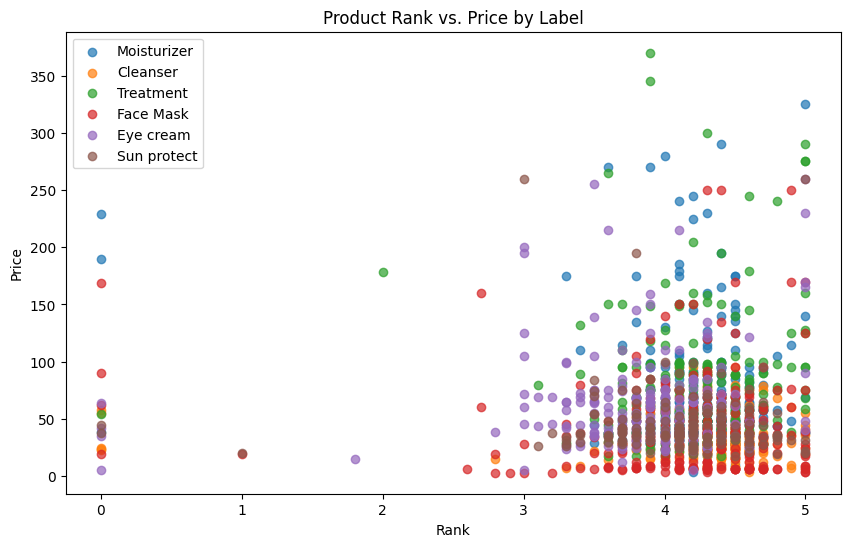

In [59]:
# @title Product Rank vs. Price by Label

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))
for label in df['Label'].unique():
    plt.scatter(df[df['Label'] == label]['Rank'], df[df['Label'] == label]['Price'], label=label, alpha=0.7)
plt.title('Product Rank vs. Price by Label')
plt.xlabel('Rank')
plt.ylabel('Price')
_ = plt.legend()

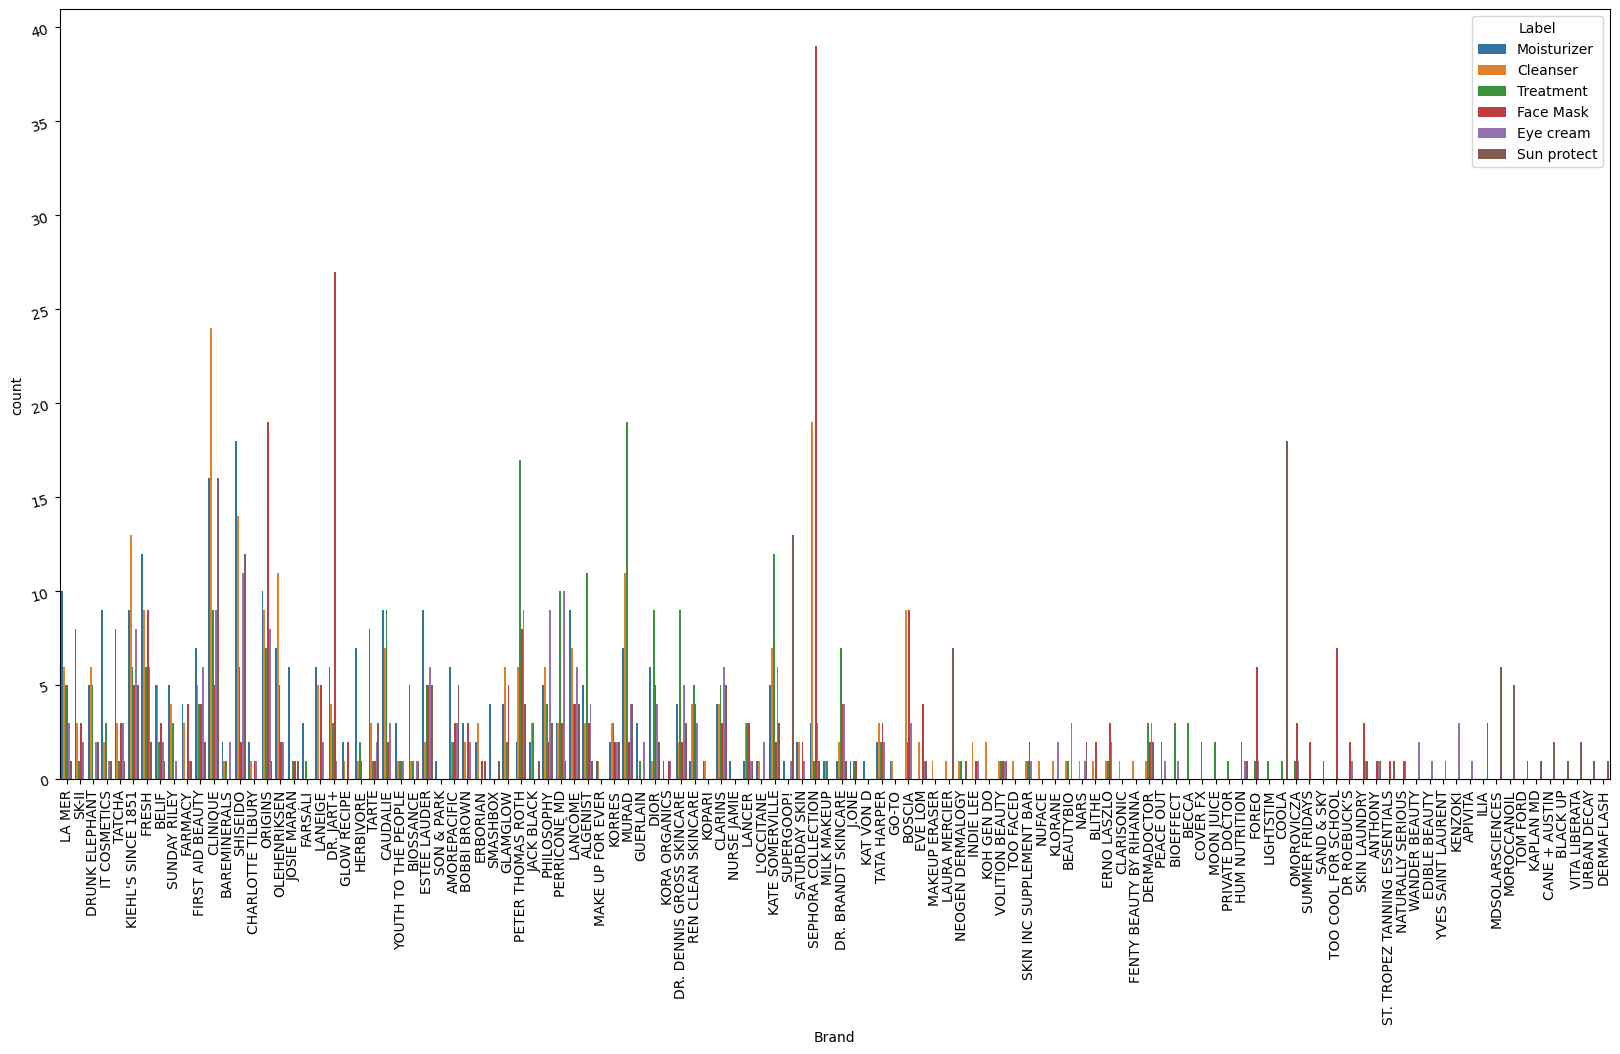

In [58]:
# let's plot a graph in sutable size brand vs label to see the trends
plt.figure(figsize=(20, 10))
sns.countplot(x='Brand', hue='Label', data=df)
plt.xticks(rotation=90)
plt.yticks(rotation=15)
plt.show()

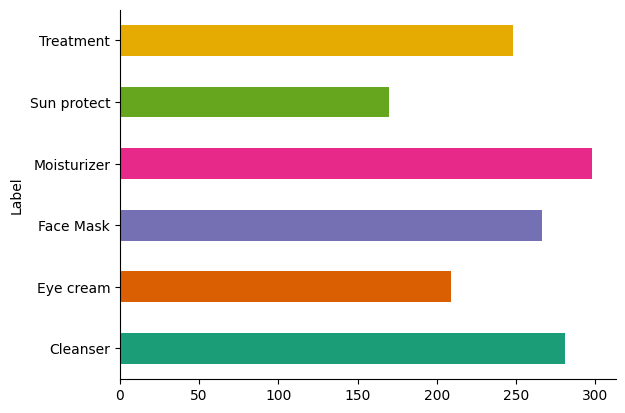

In [9]:
# @title Label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

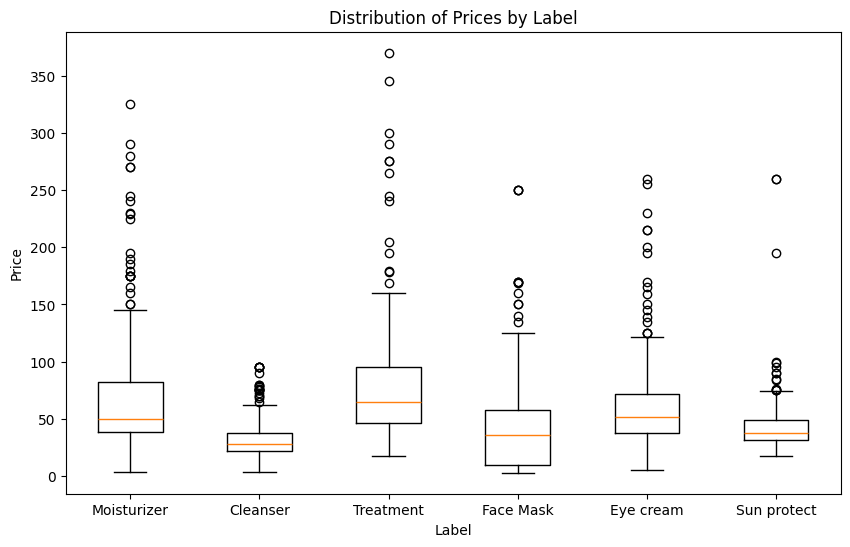

In [6]:
# @title Distribution of Prices by Label

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Label'] == label]['Price'] for label in df['Label'].unique()], labels=df['Label'].unique())
plt.title('Distribution of Prices by Label')
plt.xlabel('Label')
_ = plt.ylabel('Price')

In [7]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

## Unique Values Analysis

In [10]:
#Let's see the unique entries in textual columns
df.nunique()


,0
Label,6
Brand,116
Name,1472
Price,146
Rank,29
Ingredients,1334
Combination,2
Dry,2
Normal,2
Oily,2


In [29]:
Combined_ingredients_list = df["Ingredients"].unique()
Combined_ingredients_list

array(['Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.',
       'Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.',
       'Water, Dicaprylyl Carbonate, Gly

## Score calculations

In [37]:
# Summarize skin type compatibility for each label
label_skin_summary = df.groupby("Label")[["Dry", "Oily", "Combination", "Normal", "Sensitive"]].sum()

label_skin_summary


,Dry,Oily,Combination,Normal,Sensitive
Label,,,,,
Cleanser,140,155,161,156,122
Eye cream,134,125,131,133,113
Face Mask,189,184,202,200,159
Moisturizer,190,179,199,204,162
Sun protect,89,85,96,95,78
Treatment,162,166,177,172,122


## Function Build: Best suited Label according to the skin_type_socres

In [39]:
#Let's build a function which takes scores and gives best suited labels using the above matrix
def suggest_label(dry_score, oily_score, combination_score, normal_score, sensitive_score):
    """
    Suggests a label based on skin type scores.

    Args:
        dry_score: Score for dry skin.
        oily_score: Score for oily skin.
        combination_score: Score for combination skin.
        normal_score: Score for normal skin.
        sensitive_score: Score for sensitive skin.

    Returns:
        The suggested label.
    """
    # Ensure the DataFrame has the correct structure
    if label_skin_summary.index.name != 'Label' or 'Dry' not in label_skin_summary.columns:
        raise KeyError("DataFrame must have 'Label' as index and required skin type columns.")

    # Create a Series with the input skin type scores
    input_data = pd.Series({
        'Dry': dry_score,
        'Oily': oily_score,
        'Combination': combination_score,
        'Normal': normal_score,
        'Sensitive': sensitive_score
    })

    # Normalize the input vector and each row in the DataFrame
    input_norm = np.linalg.norm(input_data)
    skin_type_norms = label_skin_summary.apply(np.linalg.norm, axis=1)

    # Calculate cosine similarity
    cosine_similarities = label_skin_summary.dot(input_data) / (skin_type_norms * input_norm)

    # Find the label with the highest similarity
    most_similar_label = cosine_similarities.idxmax()

    return most_similar_label

# Example usage
dry_score = 150
oily_score = 100
combination_score = 120
normal_score = 160
sensitive_score = 80

try:
    suggested_label = suggest_label(dry_score, oily_score, combination_score, normal_score, sensitive_score)
    print(f"Suggested label: {suggested_label}")
except KeyError as e:
    print(f"Error: {e}")

Suggested label: Moisturizer


## Ingridents simplification and Analysis

In [18]:
# Step 1: Extract unique labels
unique_labels = df["Label"].unique()
unique_labels

array(['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream',
       'Sun protect'], dtype=object)

In [23]:
# Step 2: Extract unique ingredients
ingredients_list = df["Ingredients"].str.split(", ").explode().unique()
ingredients_list

array(['Algae (Seaweed) Extract', 'Mineral Oil', 'Petrolatum', ...,
       'Tin oxide', 'CI 77491 (Iron oxides)',
       'Visit the DERMAFLASH boutique'], dtype=object)

In [24]:
# Step 3: Create the new DataFrame
new_df = pd.DataFrame(0, index=ingredients_list, columns=unique_labels)

In [25]:
# Step 4: Populate the new DataFrame
for label in unique_labels:
    # Get the rows with the current label
    label_rows = df[df["Label"] == label]
    # Loop through each ingredient and check if it belongs to the label
    for ingredient in ingredients_list:
        if any(ingredient in row for row in label_rows["Ingredients"]):
            new_df.at[ingredient, label] = 1
# Display the new DataFrame
# print(new_df)

In [28]:
# Display the new DataFrame
new_df

,Moisturizer,Cleanser,Treatment,Face Mask,Eye cream,Sun protect
Algae (Seaweed) Extract,1,1,1,1,1,1
Mineral Oil,1,1,0,0,1,1
Petrolatum,1,1,1,1,1,1
Glycerin,1,1,1,1,1,1
Isohexadecane,1,1,1,1,1,1
...,...,...,...,...,...,...
Citrus aurantium amara (Bitter orange) flower oil,0,0,0,0,0,1
Dimethyl isosorbide,0,0,0,0,0,1
Tin oxide,0,0,0,0,0,1
CI 77491 (Iron oxides),0,0,0,0,0,1


## Correlation Analysis (Skin Type vs Ingredients)

In [41]:
#Let's use the new_df and make some correlation plots
corr_matrix = new_df.corr()
corr_matrix

,Moisturizer,Cleanser,Treatment,Face Mask,Eye cream,Sun protect
Moisturizer,1.000000,0.139562,0.225599,0.152751,0.265878,0.247626
Cleanser,0.139562,1.000000,0.223309,0.190035,0.180899,0.183594
Treatment,0.225599,0.223309,1.000000,0.232263,0.283590,0.222136
Face Mask,0.152751,0.190035,0.232263,1.000000,0.214303,0.167167
Eye cream,0.265878,0.180899,0.283590,0.214303,1.000000,0.236203
Sun protect,0.247626,0.183594,0.222136,0.167167,0.236203,1.000000


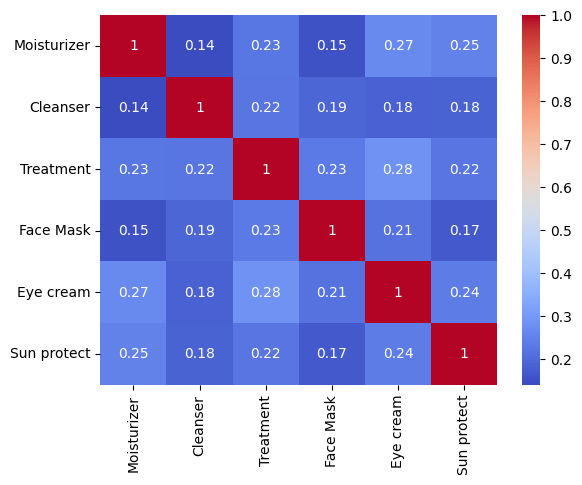

In [43]:
#Let's use the new_df and make some correlation heat maps
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [62]:
# Average suitability score for each skin type by label
label_skin_avg = df.groupby("Label")[["Dry", "Oily", "Combination", "Normal", "Sensitive"]].mean()

print(label_skin_avg)



                  Dry      Oily  Combination    Normal  Sensitive
Label                                                            
Cleanser     0.498221  0.551601     0.572954  0.555160   0.434164
Eye cream    0.641148  0.598086     0.626794  0.636364   0.540670
Face Mask    0.710526  0.691729     0.759398  0.751880   0.597744
Moisturizer  0.637584  0.600671     0.667785  0.684564   0.543624
Sun protect  0.523529  0.500000     0.564706  0.558824   0.458824
Treatment    0.653226  0.669355     0.713710  0.693548   0.491935


## Ingredients Analysis (Most Common)

In [63]:
# 1. Parse Ingredients into separate rows for analysis
df_exploded = df.assign(Ingredient=df["Ingredients"].str.split(", ")).explode("Ingredient")

In [64]:
# 2. Analyze Label-Ingredient Relationship
label_ingredient_summary = df_exploded.groupby(["Label", "Ingredient"]).size().unstack(fill_value=0)

In [65]:
print("Label-Ingredient Relationship:")
print(label_ingredient_summary)

Label-Ingredient Relationship:
Ingredient       Aloe Barbadensis (Aloe Vera) Leaf Juice  #NAME?  \
Label                                                              
Cleanser     0                                         0       1   
Eye cream    1                                         0       0   
Face Mask    0                                         1       0   
Moisturizer  1                                         0       2   
Sun protect  0                                         0       0   
Treatment    0                                         0       1   

Ingredient   (+/-):Titanium Dioxide (Ci 77891)  (-)-Alpha-Bisabolol  \
Label                                                                 
Cleanser                                     0                    0   
Eye cream                                    0                    0   
Face Mask                                    1                    1   
Moisturizer                                  0                    0  

In [66]:
# 3. Analyze Skin Type Suitability
skin_type_columns = ["Combination", "Dry", "Normal", "Oily", "Sensitive"]
skin_type_suitability = df.groupby("Label")[skin_type_columns].sum()

In [67]:
print("\nSkin Type Suitability by Label:")
print(skin_type_suitability)


Skin Type Suitability by Label:
             Combination  Dry  Normal  Oily  Sensitive
Label                                                 
Cleanser             161  140     156   155        122
Eye cream            131  134     133   125        113
Face Mask            202  189     200   184        159
Moisturizer          199  190     204   179        162
Sun protect           96   89      95    85         78
Treatment            177  162     172   166        122


In [68]:
# 4. Find Most Common Ingredients for each Label
most_common_ingredients = (
    df_exploded.groupby("Label")["Ingredient"]
    .value_counts()
    .groupby(level=0)
    .head(3)  # Top 3 ingredients
)

In [69]:
print("\nMost Common Ingredients by Label:")
print(most_common_ingredients)


Most Common Ingredients by Label:
Label        Ingredient     
Cleanser     Water              180
             Glycerin           148
             Butylene Glycol    114
Eye cream    Water              152
             Glycerin           144
             Butylene Glycol    117
Face Mask    Glycerin           212
             Water              187
             Butylene Glycol    166
Moisturizer  Water              188
             Glycerin           175
             Phenoxyethanol     153
Sun protect  Water               77
             Glycerin            68
             Phenoxyethanol      66
Treatment    Water              160
             Glycerin           154
             Phenoxyethanol     127
Name: count, dtype: int64


## Visualising Top 3 Ingridents in each Lables

In [73]:
# Extract the top ingredients for each label
top_ingredients = (
    df_exploded.groupby("Label")["Ingredient"]
    .value_counts()
    .groupby(level=0)
    .head(5)
    .reset_index(name="Count")
)

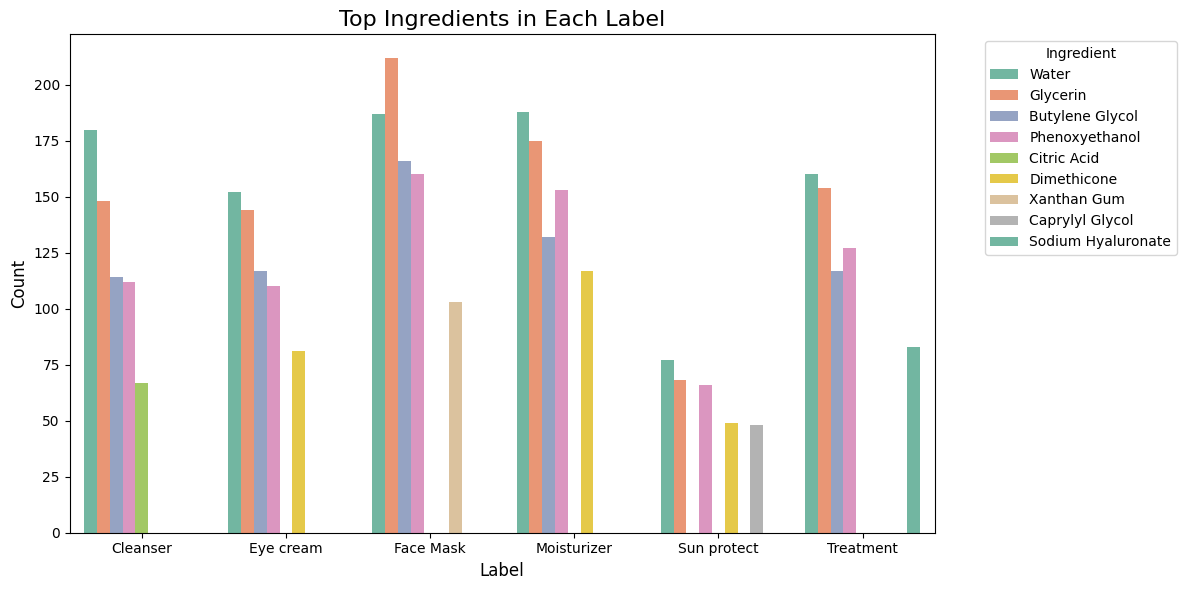

In [74]:
# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_ingredients,
    x="Label",
    y="Count",
    hue="Ingredient",
    palette="Set2"
)

plt.title("Top Ingredients in Each Label", fontsize=16)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Ingredient", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()